In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.autograd.set_detect_anomaly(True)

In [81]:
class NARX(nn.Module):
    def __init__(self, input_lags, output_lags):
        super(NARX, self).__init__()
        self.fc1 = nn.Linear(input_lags+output_lags, 20, bias=False)
        self.fc2 = nn.Linear(20, 1, bias=False)
        self.input_lags = input_lags
        self.output_lags = output_lags
    def forward(self, x, lags):
        # Merge Lags and Inputs
        x = torch.cat((x.reshape(1), lags), dim = 0)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    def initLags(self):
        return torch.zeros((self.output_lags))

In [82]:

narx = NARX(1, 5)


In [83]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(narx.parameters())

In [84]:
inputs = torch.rand((100))
outputs = torch.rand((100))



In [89]:


for epoch in range(20):
    y_hat = torch.zeros_like(inputs)
    optimizer.zero_grad()
    lags = narx.initLags()
    # Predict whole Dataset
    for i in range(len(inputs)):
        y_hat[i] = narx(inputs[i], lags)
        lags = torch.roll(lags, 1, 0)
        lags[0] = y_hat[i]
    # Compute Loss and optimize
    loss = criterion(y_hat, outputs)
    optimizer.zero_grad()
    loss.backward(retain_graph=False)
    print(loss)
    optimizer.step()
        
    

        



tensor(0.3447, grad_fn=<MseLossBackward0>)
tensor(0.3426, grad_fn=<MseLossBackward0>)
tensor(0.3405, grad_fn=<MseLossBackward0>)
tensor(0.3383, grad_fn=<MseLossBackward0>)
tensor(0.3362, grad_fn=<MseLossBackward0>)
tensor(0.3340, grad_fn=<MseLossBackward0>)
tensor(0.3318, grad_fn=<MseLossBackward0>)
tensor(0.3295, grad_fn=<MseLossBackward0>)
tensor(0.3272, grad_fn=<MseLossBackward0>)
tensor(0.3249, grad_fn=<MseLossBackward0>)
tensor(0.3226, grad_fn=<MseLossBackward0>)
tensor(0.3202, grad_fn=<MseLossBackward0>)
tensor(0.3178, grad_fn=<MseLossBackward0>)
tensor(0.3153, grad_fn=<MseLossBackward0>)
tensor(0.3128, grad_fn=<MseLossBackward0>)
tensor(0.3102, grad_fn=<MseLossBackward0>)
tensor(0.3075, grad_fn=<MseLossBackward0>)
tensor(0.3046, grad_fn=<MseLossBackward0>)
tensor(0.3016, grad_fn=<MseLossBackward0>)
tensor(0.2985, grad_fn=<MseLossBackward0>)


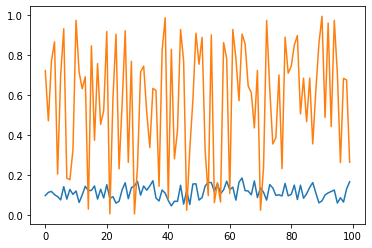

In [90]:
y_hat = torch.zeros_like(inputs)
lags = narx.initLags()
# Predict whole Dataset
for i in range(len(inputs)):
    y_hat[i] = narx(inputs[i], lags)
    lags = torch.roll(lags, 1, 0)
    lags[0] = y_hat[i]
plt.plot(y_hat.detach().numpy())
plt.plot(outputs)